### Gradient Boosting

This activity focuses on using the Gradient Boosting models in scikitlearn.  A dataset similar to the lecture example is created for the regression problem.  For classification, the same fetal health dataset from the earlier parts of the module is used.  

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [80]:
def f(x):
    '''
    Small example regression dataset.
    '''
    np.random.seed(42)
    return np.sin(x**2) + np.random.normal(size = len(x), scale = 0.1)

In [82]:
x = np.linspace(0, 3, 20)
y = f(x)

In [83]:
X = x.reshape(-1, 1) #Make it 2D for sklearn

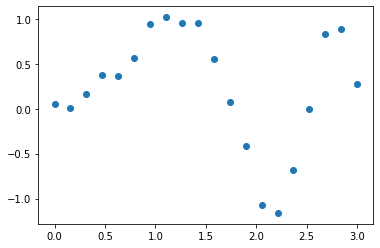

In [84]:
plt.scatter(x, y)

[Back to top](#-Index)

### Problem 1

#### Gradient Boosted Regressor

Use the `GradientBoostingRegressor` to create a model `reg` and fit the model on `X` and `y`.  Assign the predictions as an array to `reg_pred`.  Uncomment the code to visualize the results.

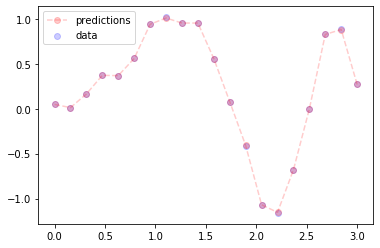

In [90]:
### GRADED
reg = ''
reg_pred = ''

### BEGIN SOLUTION
reg = GradientBoostingRegressor().fit(X, y)
reg_pred = reg.predict(X)
### END SOLUTION

### ANSWER CHECK
plt.scatter(x, y, color = 'blue', alpha = 0.2, label = 'data')
plt.plot(x, reg_pred, '--ro', alpha = 0.2, label = 'predictions')
plt.legend();

In [91]:
### BEGIN HIDDEN TESTS
reg_ = GradientBoostingRegressor().fit(X, y)
reg_pred_ = reg_.predict(X)
#
#
#
np.testing.assert_array_equal(reg_pred_, reg_pred)
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 2

#### Gradient Boosted Classifier

The data for classification is again loaded and prepared below.  Use this to create a `GradientBoostedClassifier` named `clf` and fit this on the training data.  Score the accuracy of the model as `boost_acc` below.  

In [62]:
df = pd.read_csv('data/fetal.zip', compression = 'zip')
X = df.drop('fetal_health', axis = 1).values
y = df['fetal_health']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state=42)

In [92]:
### GRADED
clf = ''
boost_acc = ''

### BEGIN SOLUTION
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
boost_acc = clf.score(X_test, y_test)
### END SOLUTION

### ANSWER CHECK
print(boost_acc)

0.9511278195488722


In [93]:
### BEGIN HIDDEN TESTS
clf_ = GradientBoostingClassifier()
clf_.fit(X_train, y_train)
boost_acc_ = clf_.score(X_test, y_test)
#
#
#
assert boost_acc == boost_acc_
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 3

#### Evaluating the Model

Create a confusion matrix for the boosted model on the test data.  What label was perfectly predicted?  Enter your answer as an integer to `ans3` below -- 1, 2, or 3.  

In [94]:
### GRADED
ans3 = ''

### BEGIN SOLUTION
ans3 = 3
### END SOLUTION

### ANSWER CHECK
print(type(ans3))
print(ans3)

<class 'int'>
3


In [95]:
### BEGIN HIDDEN TESTS
ans3_ = 3
#
#
#
assert ans3 == ans3_
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 4

#### Improving the Model

An obvious next step is searching over parameters of the model and trying to improve the performance further.  Because this is a slow model, this is left to you to explore further in an environment where computation time is less important.  One approach to speeding up the gradient descent algorithm is the `HistGradientBoostingClassifier`.  Examine the documentation [here](https://scikit-learn.org/stable/modules/ensemble.html#histogram-based-gradient-boosting) on this estimator and create an instance of it below as `hist_booster`.  

As an extra extension, read on how to evaluate a boosted model using partial dependence plots from the `sklearn.inspection` module [here](https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py).

**KEEP IN MIND THE VERSION OF SCIKITLEARN**

In [98]:
import sklearn

In [99]:
sklearn.__version__

'1.0'

In [97]:
### GRADED
hist_booster = ''

### BEGIN SOLUTION
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier
hist_booster = HistGradientBoostingClassifier()
### END SOLUTION

### ANSWER CHECK
type(hist_booster)

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier

In [100]:
### BEGIN HIDDEN TESTS
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier
hist_booster_ = HistGradientBoostingClassifier()
#
#
#
assert type(hist_booster) == type(hist_booster_)
### END HIDDEN TESTS